In [1]:
from sklearn.datasets import make_regression
import numpy as np 

In [2]:
X,y = make_regression(
    n_samples = 8, n_features = 1, n_informative = 1, n_targets = 1 ,noise= 10, random_state= 42)  

In [3]:
X

array([[ 0.49671415],
       [ 0.76743473],
       [-0.23415337],
       [-0.23413696],
       [ 0.64768854],
       [ 1.57921282],
       [ 1.52302986],
       [-0.1382643 ]])

In [4]:
y

array([ -4.78632038, -13.6590344 , -26.60748301,   9.02173774,
        -4.38056756,  11.41518053,  -6.10574844,  -5.53630814])

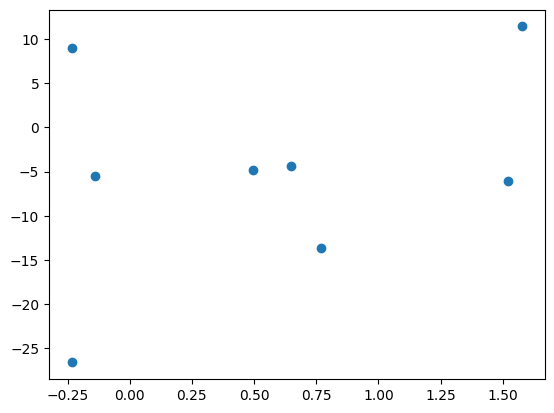

In [5]:
import matplotlib.pyplot as plt 

plt.scatter(X,y)

## Using OLS calculating slope and intercept 

In [6]:
from sklearn.linear_model import LinearRegression 

lir = LinearRegression()
lir.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
lir.intercept_

-8.047564218992704

In [8]:
lir.coef_

array([5.38668927])

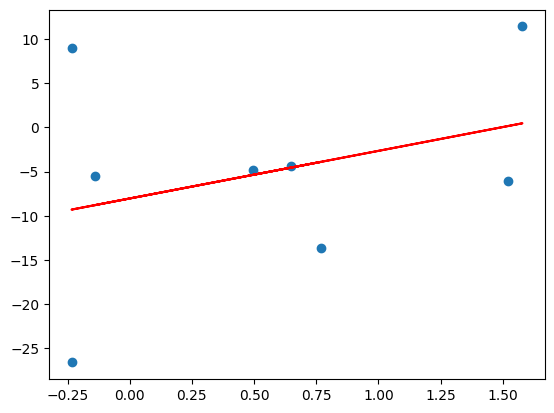

In [9]:
plt.scatter(X,y) 
plt.plot(X,lir.predict(X), color = 'red')

## Turn to use Gradient Descent assuming fixed  slope m = 5.39 and initially taking b= 0 

In [10]:
y_pred = ((5.39*X) + 0).ravel()
y_pred

array([ 2.67728928,  4.13647319, -1.26208669, -1.2619982 ,  3.49104122,
        8.51195708,  8.20913093, -0.74524458])

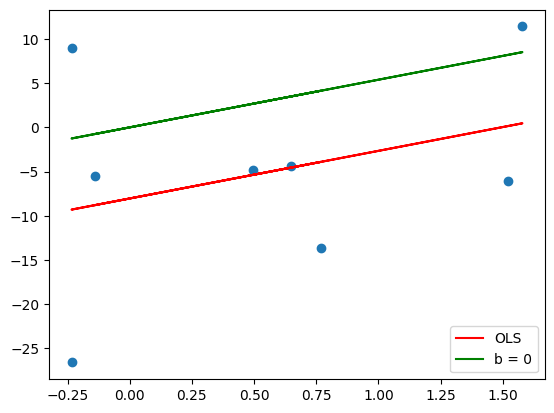

In [11]:
plt.scatter(X,y) 
plt.plot(X,lir.predict(X),color = 'red', label = 'OLS') 
plt.plot(X,y_pred, color = 'green',label = 'b = 0')
plt.legend()

In [12]:
m = 5.39 
b= 100

In [13]:
loss_slope = -2*np.sum(y - m*X.ravel() - b)
loss_slope

1728.7902117496674

In [14]:
lr = 0.1 #learning rate 
step_size = lr*loss_slope
step_size

172.87902117496674

In [15]:
b = b - step_size
b

-72.87902117496674

In [16]:
y_predi = ((m*X) + b).ravel() 
y_predi

array([-70.20173189, -68.74254798, -74.14110786, -74.14101937,
       -69.38797995, -64.3670641 , -64.66989025, -73.62426576])

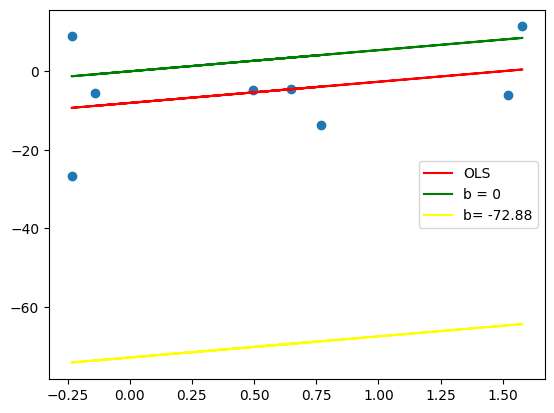

In [17]:
plt.scatter(X,y) 
plt.plot(X,lir.predict(X),color = 'red', label = 'OLS') 
plt.plot(X,y_pred, color = 'green',label = 'b = 0')
plt.plot(X,y_predi, color = 'yellow', label = f"b= {b:.2f}")
plt.legend()

In [18]:
#iteration 2 

loss_slope = -2*np.sum(y - m*X.ravel() - b)
step_size = lr*loss_slope
b2 = b - step_size
y_predi2 = ((m*X) + b).ravel() 

loss_slope, b2, y_predi2


(-1037.2741270498004,
 30.848391530013316,
 array([-70.20173189, -68.74254798, -74.14110786, -74.14101937,
        -69.38797995, -64.3670641 , -64.66989025, -73.62426576]))

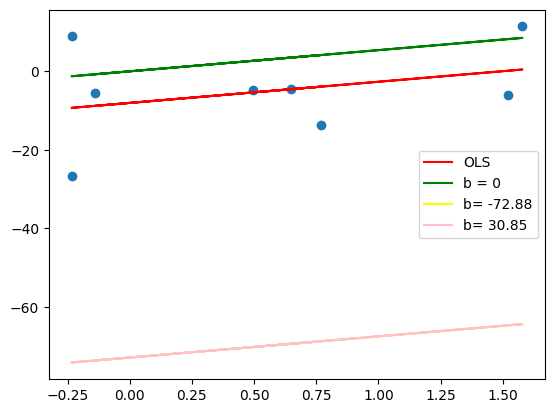

In [19]:
plt.scatter(X,y) 
plt.plot(X,lir.predict(X),color = 'red', label = 'OLS') 
plt.plot(X,y_pred, color = 'green',label = 'b = 0')
plt.plot(X,y_predi, color = 'yellow', label = f"b= {b:.2f}")
plt.plot(X,y_predi2, color = 'pink', label = f"b= {b2:.2f}")
plt.legend()

In [20]:
#iteration 3

loss_slope = -2*np.sum(y - m*X.ravel() - b2)
step_size = lr*loss_slope
b3 = b2 - step_size
y_predi3 = ((m*X) + b2).ravel() 

loss_slope, b3, y_predi3


(622.3644762298804,
 -31.38805609297473,
 array([33.52568081, 34.98486472, 29.58630484, 29.58639333, 34.33943275,
        39.36034861, 39.05752246, 30.10314695]))

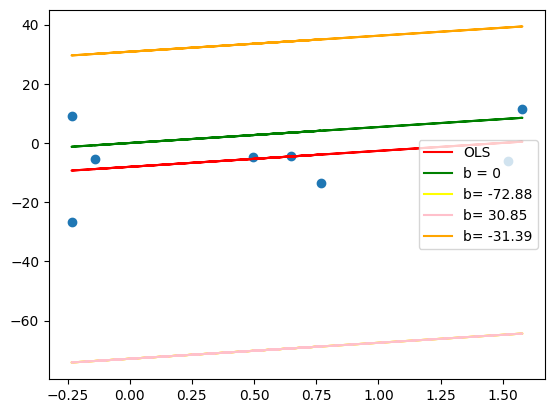

In [21]:
plt.scatter(X,y) 
plt.plot(X,lir.predict(X),color = 'red', label = 'OLS') 
plt.plot(X,y_pred, color = 'green',label = 'b = 0')
plt.plot(X,y_predi, color = 'yellow', label = f"b= {b:.2f}")
plt.plot(X,y_predi2, color = 'pink', label = f"b= {b2:.2f}")
plt.plot(X,y_predi3, color = 'orange', label = f"b= {b3:.2f}")
plt.legend()

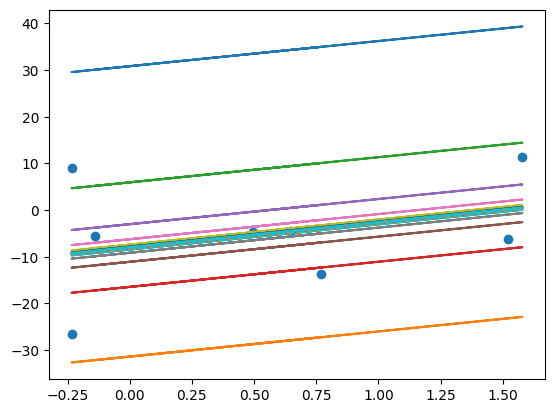

In [22]:
# now lets run a loop 

epochs = 50 

for i in range(epochs): 
    loss_slope = -2*np.sum(y - m*X.ravel() - b) 
    b = b - (lr*loss_slope) 
    y_predict = m*X + b 
    plt.plot(X,y_predict) 
plt.scatter(X,y) 

In [23]:
print(lir.intercept_), print(b)

-8.047564218992704
-8.049388234878217


(None, None)

# Our mission is Successful

# Let's create our own class 

In [24]:
class GDregressor: 
    def __init__(self,epochs,learning_rate): 
        self.m = 5.39 
        self.b = 0
        self.epochs = epochs 
        self.learning_rate = learning_rate 
    def fit(self,X,y): 
        for i in range(self.epochs): 
            new_loss_slope = -2*np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - self.learning_rate*new_loss_slope
            print(new_loss_slope,self.b)

        print(self.b)
            

In [25]:
gd = GDregressor(50,0.01)

In [26]:
gd.fit(X,y)

128.79021174966738 -1.2879021174966738
108.18377786972059 -2.36973989619388
90.87437341056528 -3.278483630299533
76.33447366487485 -4.041828366948281
64.12095787849488 -4.68303794573323
53.86160461793569 -5.221653991912587
45.243747879065985 -5.674091470703247
38.00474821841542 -6.054138952887401
31.92398850346896 -6.373378837922091
26.81615034291392 -6.64154034135123
22.52556628804769 -6.866796004231706
18.921475681960068 -7.056010761051307
15.894039572846456 -7.2149511567797715
13.350993241191023 -7.348461089191682
11.214834322600463 -7.460609432417686
9.420460830984386 -7.55481404072753
7.913187098026892 -7.633945911707799
6.64707716234259 -7.700416683331225
5.583544816367766 -7.756252131494903
4.690177645748921 -7.803153907952392
3.9397492224290964 -7.842551400176683
3.309389346840444 -7.875645293645087
2.779887051345977 -7.903444164158548
2.33510512313061 -7.926795215389854
1.9614883034297144 -7.946410098424151
1.6476501748809547 -7.96288660017296
1.384026146900002 -7.976726861641